# CIFAR-100 Training Analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [47]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [49]:
# training accuracies

baseline = pd.read_csv('cifar-100/training-data/baseline/baseline-net-simple.csv')
branch = pd.read_csv('cifar-100/training-data/branch-net/branch-net.csv')
split = pd.read_csv('cifar-100/training-data/split-net/split-net.csv')
concat = pd.read_csv('cifar-100/training-data/concat-net/concat-net.csv')
concat_inv = pd.read_csv('cifar-100/training-data/concat-net/inverse-concat-net.csv')
guide = pd.read_csv('cifar-100/training-data/guide-net/guide-net.csv')

adap_branch = pd.read_csv('cifar-100/training-data/branch-net/adaptative-branch-net.csv')
adap_split = pd.read_csv('cifar-100/training-data/split-net/adaptative-split-net.csv')
adap_concat = pd.read_csv('cifar-100/training-data/concat-net/adaptative-concat-net.csv')
adap_concat_inv = pd.read_csv('cifar-100/training-data/concat-net/adaptative-inverse-concat-net.csv')
adap_guide = pd.read_csv('cifar-100/training-data/guide-net/adaptative-guide-net.csv')

In [52]:
df_loss = pd.DataFrame(data = {'baseline': baseline['loss'],
                              'branch-net': branch['loss'],
                              'split-net': split['loss'],
                              'concat-net': concat['loss'],
                              'inverse-concat-net': concat_inv['loss'],
                              'guide-net': guide['loss']
                              })

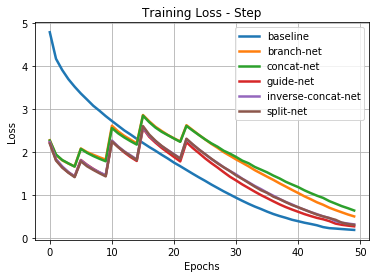

In [107]:
plt.plot(df_loss, linewidth=2.5)
plt.grid()
plt.legend(df_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss - Step')
plt.savefig('_analysis-files/cifar-100/training-loss-step.pdf')
plt.show()

In [106]:
df_adap_loss = pd.DataFrame(data = {'baseline': baseline['loss'],
                              'branch-net': adap_branch['loss'],
                              'split-net': adap_split['loss'],
                              'concat-net': adap_concat['loss'],
                              'inverse-concat-net': adap_concat_inv['loss'],      
                              'guide-net': adap_guide['loss']})

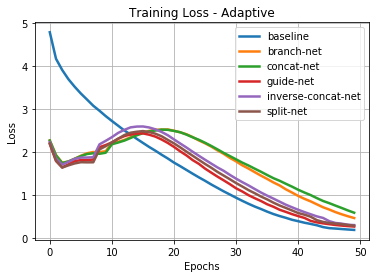

In [108]:
plt.plot(df_adap_loss, linewidth=2.5)
plt.grid()
plt.legend(df_adap_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss - Adaptive')
plt.savefig('_analysis-files/cifar-100/training-loss-adaptative.pdf')
plt.show()

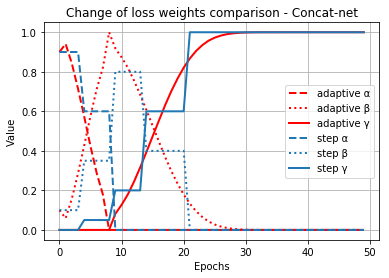

In [137]:
plt.plot(adap_concat['alpha'], 'r--', adap_concat['beta'], 'r:', adap_concat['gamma'], 'r', linewidth=2)
plt.plot(concat['alpha'], 'C0--', concat['beta'], 'C0:', concat['gamma'], 'C0', linewidth=2)
plt.legend(['adaptive α', 'adaptive β', 'adaptive γ', 'step α', 'step β', 'step γ'], loc='right')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Change of loss weights comparison - Concat-net')
plt.savefig('_analysis-files/cifar-100/loss-weights-change.pdf')
plt.show()

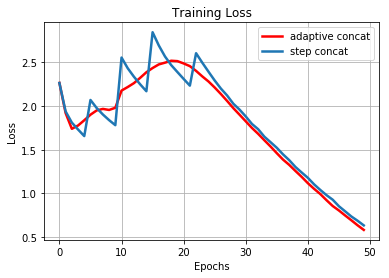

In [139]:
plt.plot(adap_concat['loss'], 'r',
         concat['loss'], 'C0',
         linewidth=2.5)

plt.legend(['adaptive concat', 'step concat'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('_analysis-files/cifar-100/comparison-loss-models-concat.pdf')
plt.show()

In [118]:
df_val_loss = pd.DataFrame(data = {'baseline': baseline['val_loss'],
                              'branch-net': adap_branch['val_predictions_fine_loss'],
                              'split-net': adap_split['val_predictions_fine_loss'],
                              'concat-net': adap_concat['val_predictions_fine_loss'],
                              'inverse-concat-net': adap_concat_inv['val_predictions_fine_loss'],     
                              'guide-net': adap_guide['val_predictions_fine_loss']})

df_val_loss = df_val_loss.apply(lambda x: smooth(x, 0.6), axis=0)

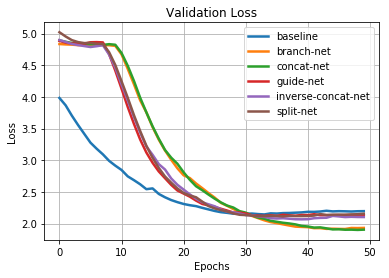

In [128]:
plt.plot(df_val_loss, linewidth=2.5)
plt.grid()
plt.legend(df_val_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.savefig('_analysis-files/cifar-100/validation-loss-step.pdf')
plt.show()

In [73]:
df_val_acc = pd.DataFrame(data = {'baseline': baseline['val_acc'],
                              'branch-net': branch['val_predictions_fine_acc'],
                              'split-net': split['val_predictions_fine_acc'],
                              'concat-net': concat['val_predictions_fine_acc'],
                              'inverse-concat-net': concat_inv['val_predictions_fine_acc'],    
                              'guide-net': guide['val_predictions_fine_acc']})

In [122]:
df_val_acc = pd.DataFrame(data = {'baseline': baseline['val_acc'],
                              'branch-net': adap_branch['val_predictions_fine_acc'],
                              'split-net': adap_split['val_predictions_fine_acc'],
                              'concat-net': adap_concat['val_predictions_fine_acc'],
                              'inverse-concat-net': adap_concat_inv['val_predictions_fine_acc'],    
                              'guide-net': adap_guide['val_predictions_fine_acc']})

df_val_acc = df_val_acc.apply(lambda x: smooth(x, 0.6), axis=0)

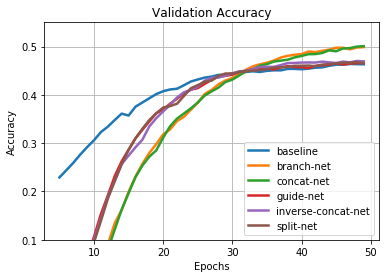

In [133]:
plt.plot(df_val_acc[5:], linewidth=2.5)
plt.grid()
axes = plt.gca()
axes.set_ylim([0.1,0.55])
plt.legend(df_val_acc.columns)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.savefig('_analysis-files/cifar-100/validation-accuracy-adap.pdf')
plt.show()

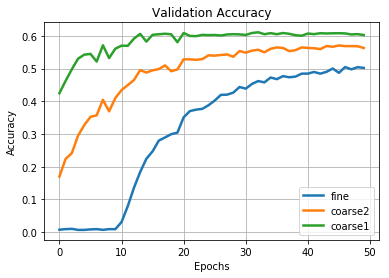

In [127]:
levels_acc = adap_concat[['val_predictions_fine_acc', 
                 'val_predictions_coarse2_acc', 
                 'val_predictions_coarse1_acc']]

plt.plot(levels_acc, linewidth=2.5)
plt.grid()
axes = plt.gca()
plt.legend(['fine', 'coarse2', 'coarse1'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.savefig('_analysis-files/cifar-100/levels-acc-adap-concat.pdf')
plt.show()